In [1]:
from sqlalchemy import create_engine
import pandas as pd 
mysql_setting = {
    'host' : "localhost",
    'dbname': "spider",
    'user': "root",
    'password': ""
}

def getDatabaseConn():
    engine = create_engine('mysql://{user}:{password}@{host}:3306/{dbname}'.format(**mysql_setting), echo=False)
    conn = engine.connect()
    return conn
conn = getDatabaseConn()

In [65]:
sql = """
    select name, position_labels from 51job_position
"""

lc_df = pd.read_sql(sql, conn)

In [2]:
import pandas as pd 
df = pd.read_hdf("/Users/monstar/Desktop/ProjectCode/bigdatarecruit/DataMining/salaryWE.h5")

In [6]:
df_rename = df.rename(columns={'work_year' : '工作年限', 'mean' : '平均薪资', 'education' : '教育程度'})
df_res = df_rename.pivot_table(index=['工作年限'], columns='教育程度', values=['平均薪资']).rename(columns={'NULL' : '其他'}).apply(lambda x: round(x,2))
df_res.T
    

工作年限        10年以上     1年     2年   3-4年   5-7年   8-9年      无
     教育程度                                                  
平均薪资 其他     17.21   5.72   6.40   8.00  10.84  15.41   6.96
     中专     11.25   5.17   5.51   6.47   7.81  11.03   5.42
     中技      8.38   4.76   5.03   5.31   6.57   8.37   5.02
     初中及以下  15.47   5.30   5.06   6.49   5.92   5.39   6.11
     博士     33.36  15.20  15.73  26.84  23.11  44.44  16.17
     大专     16.37   5.80   6.42   7.93  10.45  13.76   6.10
     本科     22.73   6.51   7.53   9.44  12.89  18.06   7.69
     硕士     27.93   8.63  10.52  12.36  17.43  20.74   9.61
     高中      7.69   5.70   5.80   6.32   7.77  10.25   6.33

In [20]:
df_copy = pd.read_clipboard()

In [21]:
df_copy.head()

,position_type,标准差,平均值,中位数
0,CTO/CIO,27930,43764,40000
1,合伙人,42953,37956,20000
2,行长/副行长,28514,33540,30000
3,首席财务官CFO,24566,32295,30000
4,首席执行官CEO/总裁/总经理,25323,29056,20000


In [8]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()
d.head()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,...,-0.951219,0.832973,-1.000208,0.343463,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497
1,-1.230374,0.205848,0.821371,-0.493780,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,...,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,-1.094711,-1.654707
2,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,1.054113,-0.615562,...,-1.120717,0.991136,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524
3,-0.292821,0.856582,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,...,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,0.150722,0.017747,0.006885,0.329035
4,-0.587376,1.751572,0.308274,-0.894283,-0.769156,0.869197,0.371381,-0.628362,-0.922477,-0.903391,...,1.519031,0.749896,-2.269087,-0.760599,-0.955502,0.923951,0.315157,1.340910,0.678992,0.594258


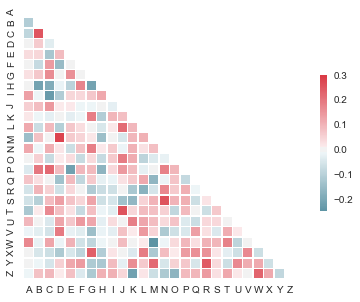

In [14]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
import tushare as ts
import matplotlib.pyplot as plt
import seaborn as sns
df = ts.get_today_ticks('600198')

[Getting data:]######################################################################

In [12]:
df_sell = df[df['type'] == '卖盘']
df_buy = df[df['type'] == '买盘']
sns.set()

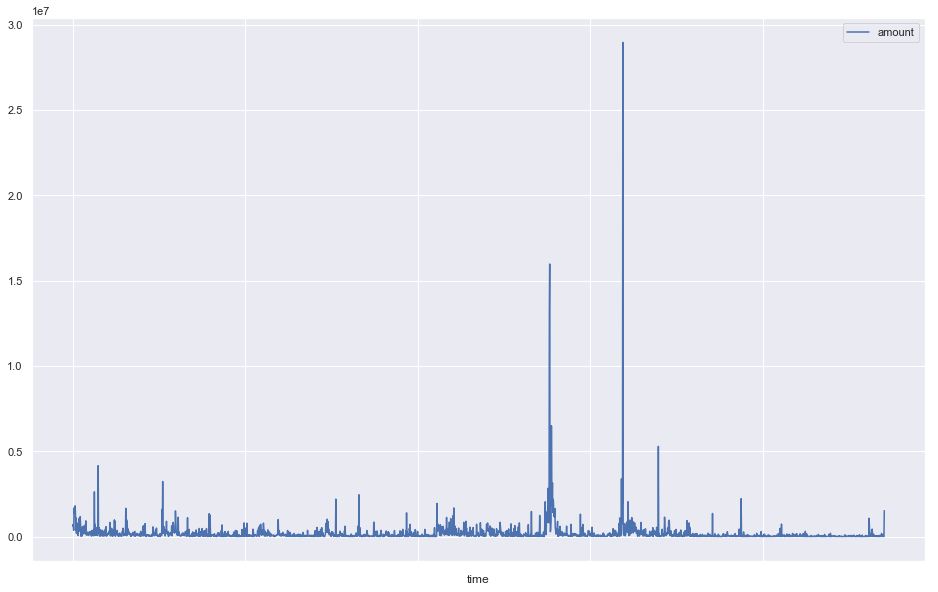

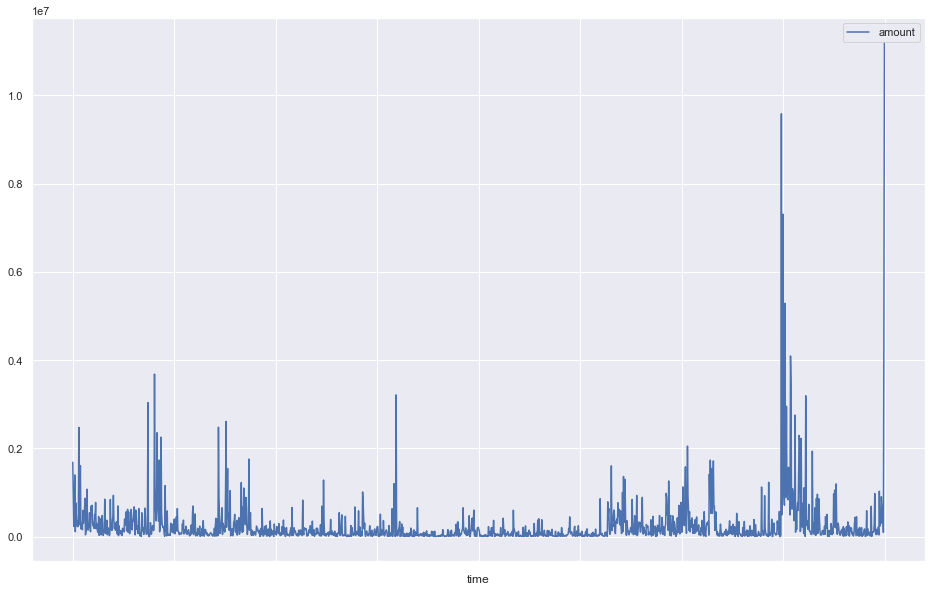

In [30]:
df_sell.groupby('time').agg({'amount': 'sum'}).plot(figsize=(16, 10), legend=True)
df_buy.groupby('time').agg({'amount': 'sum'}).plot(figsize=(16, 10), legend=True)